In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import Simulator as sim

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint


### This version time is taken out of model inputs ###


Using TensorFlow backend.


In [2]:
### Creating dataset from data points ###

c = 4   # Damping constant
k = 2   # Stiffness of the spring
m = 20  # Mass
F = 5   # Force


vals = sim.generate(c,k,m,F) ## Generating the training data with separate module ##


list_t = list(zip(vals[1], vals[2]))
dframe = pd.DataFrame(list_t, columns=["Speed", 'Position']) ##Creating Pandas DF from data ##
#dframe = dframe.sample(frac=1).reset_index(drop=True) ## Suffle data so we can use validation split ##
print (dframe)

Y = dframe["Position"].iloc[1:] ## Deleting first row so predictions are k+1 ##
X = dframe.head(-1)


        Speed  Position
0    0.000000  0.000000
1    0.014924  0.000449
2    0.029665  0.001789
3    0.044219  0.004009
4    0.058584  0.007097
..        ...       ...
995 -0.001677  2.497899
996 -0.001644  2.497799
997 -0.001611  2.497701
998 -0.001577  2.497606
999 -0.001544  2.497512

[1000 rows x 2 columns]


In [3]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [4]:

### CREATING NN MODEL ###

model=Sequential([Dense(2,input_shape=(2,), activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(4,activation="relu"),
                  Dense(1)])

model.compile(Adam(lr=0.001),loss=custom_loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=200,  validation_split=0.20)

##callbacks= [keras.callbacks.EarlyStopping(patience=5)],


Train on 799 samples, validate on 200 samples
Epoch 1/200
799/799 [==============================] - 1s 870us/step - loss: 2.4409 - val_loss: 2.4370
Epoch 2/200
799/799 [==============================] - 0s 170us/step - loss: 2.3584 - val_loss: 2.3539
Epoch 3/200
799/799 [==============================] - 0s 164us/step - loss: 2.2718 - val_loss: 2.2632
Epoch 4/200
799/799 [==============================] - 0s 179us/step - loss: 2.1697 - val_loss: 2.1346
Epoch 5/200
799/799 [==============================] - 0s 167us/step - loss: 1.9870 - val_loss: 1.8782
Epoch 6/200
799/799 [==============================] - 0s 168us/step - loss: 1.7066 - val_loss: 1.5590
Epoch 7/200
799/799 [==============================] - 0s 170us/step - loss: 1.3750 - val_loss: 1.1926
Epoch 8/200
799/799 [==============================] - 0s 165us/step - loss: 1.0168 - val_loss: 0.8162
Epoch 9/200
799/799 [==============================] - 0s 165us/step - loss: 0.6733 - val_loss: 0.4778
Epoch 10/200
799/799 [====

799/799 [==============================] - 0s 166us/step - loss: 3.1834e-05 - val_loss: 4.5827e-09
Epoch 74/200
799/799 [==============================] - 0s 161us/step - loss: 2.9704e-05 - val_loss: 1.0582e-07
Epoch 75/200
799/799 [==============================] - 0s 157us/step - loss: 2.7680e-05 - val_loss: 1.0404e-07
Epoch 76/200
799/799 [==============================] - 0s 156us/step - loss: 2.5737e-05 - val_loss: 1.4979e-07
Epoch 77/200
799/799 [==============================] - 0s 157us/step - loss: 2.3965e-05 - val_loss: 5.6356e-08
Epoch 78/200
799/799 [==============================] - 0s 163us/step - loss: 2.2266e-05 - val_loss: 1.1357e-07
Epoch 79/200
799/799 [==============================] - 0s 157us/step - loss: 2.0873e-05 - val_loss: 2.2378e-08
Epoch 80/200
799/799 [==============================] - 0s 154us/step - loss: 1.9361e-05 - val_loss: 1.3369e-08
Epoch 81/200
799/799 [==============================] - 0s 153us/step - loss: 1.7976e-05 - val_loss: 4.1529e-08
Epoch

799/799 [==============================] - 0s 159us/step - loss: 2.3569e-07 - val_loss: 5.2840e-10
Epoch 146/200
799/799 [==============================] - 0s 167us/step - loss: 2.2227e-07 - val_loss: 3.7095e-10
Epoch 147/200
799/799 [==============================] - 0s 152us/step - loss: 2.0871e-07 - val_loss: 1.9181e-10
Epoch 148/200
799/799 [==============================] - 0s 156us/step - loss: 1.9485e-07 - val_loss: 1.9060e-09
Epoch 149/200
799/799 [==============================] - 0s 164us/step - loss: 1.8511e-07 - val_loss: 1.5769e-10
Epoch 150/200
799/799 [==============================] - 0s 154us/step - loss: 1.7325e-07 - val_loss: 1.0303e-09
Epoch 151/200
799/799 [==============================] - 0s 154us/step - loss: 1.6650e-07 - val_loss: 4.7762e-12
Epoch 152/200
799/799 [==============================] - 0s 160us/step - loss: 1.5361e-07 - val_loss: 1.3524e-09
Epoch 153/200
799/799 [==============================] - 0s 166us/step - loss: 1.4569e-07 - val_loss: 6.2579e-

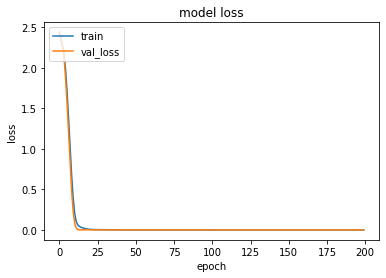

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [7]:
### Creating testing data ###

#c = 5 # Damping constant
#k = 6 # Stiffness of the spring
#m = 40 # Mass
F2 = randint(1,10)  #Different force for testing


testvals = sim.generate(c,k,m,F2,x0=0.1) ## Generating testing data##


list_t2 = list(zip( testvals[1], testvals[2]))
dframe2 = pd.DataFrame(list_t2, columns=["Speed", 'Position'])
timeframe = pd.DataFrame(testvals[0], columns=["Time"]) ## For plotting resutlts


print (dframe2)

Y2 = dframe2["Position"].iloc[1:]
X2 = dframe2.head(-1)


        Speed  Position
0    0.000000  0.100000
1    0.005373  0.100162
2    0.010679  0.100644
3    0.015919  0.101443
4    0.021090  0.102555
..        ...       ...
995 -0.000604  0.999243
996 -0.000592  0.999208
997 -0.000580  0.999172
998 -0.000568  0.999138
999 -0.000556  0.999104

[1000 rows x 2 columns]


999/999 [==============================] - 0s 21us/step
7.998449900373986e-09


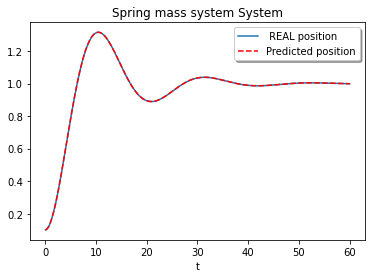

In [8]:
#### Test ####

results = model.evaluate(X, Y, batch_size=128)
print(results)

y_pred = [] ## List for predictions

for row in X2.itertuples(): ## Iterates trough test set getting predictions
    xr = model.predict(np.array([[row.Speed, row.Position]])) 
    y_pred.append(float(xr[0]))

 

plt.plot(timeframe.iloc[1:], Y2)
plt.plot(timeframe.iloc[1:], y_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('Spring mass system System')
plt.show()

In [14]:
keras.backend.clear_session() ## To start over again